In [177]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

In [178]:
def initialize_s(qc, n):
    for q in list(range(n)):
        qc.h(q)

In [179]:
def ttt_oracle(qc):
    wins = [
        [0, 1, 2],
        [3, 4, 5],
        [6, 7, 8],
        [0, 3, 6],
        [1, 4, 7],
        [2, 5, 8],
        [0, 4, 8],
        [2, 4, 6],
    ]

    for i, clause in enumerate(wins):
        qc.mct(clause + [9], 10 + i)

    qc.barrier(list(range(10, 18)))
    for i in range(len(wins)):
        qc.x(10 + i)

    qc.mcx(list(range(10, 18)), 18)
    qc.x(18)

    for i, clause in enumerate(wins):
        qc.x(10 + i)
        qc.mct(clause + [9], 10 + i)

def multicontrolled_z(qc, control, target):
    qc.h(target)
    qc.mct(control, target)
    qc.h(target)

def diffuser(qc):
    for qubit in range(9):
        qc.h(qubit)
        qc.x(qubit)

    multicontrolled_z(qc, list(range(9)), 18)

    for qubit in range(9):
        qc.x(qubit)
        qc.h(qubit)

In [180]:
circuit = QuantumCircuit(19, 9)

circuit.x(9)

initialize_s(circuit, 9)

for i in range(3):
    circuit.barrier(list(range(18)))

    ttt_oracle(circuit)

    circuit.barrier(list(range(18)))

    diffuser(circuit)


# Output
circuit.measure(list(range(9)), list(range(9)))
#circuit.measure([9], [8])

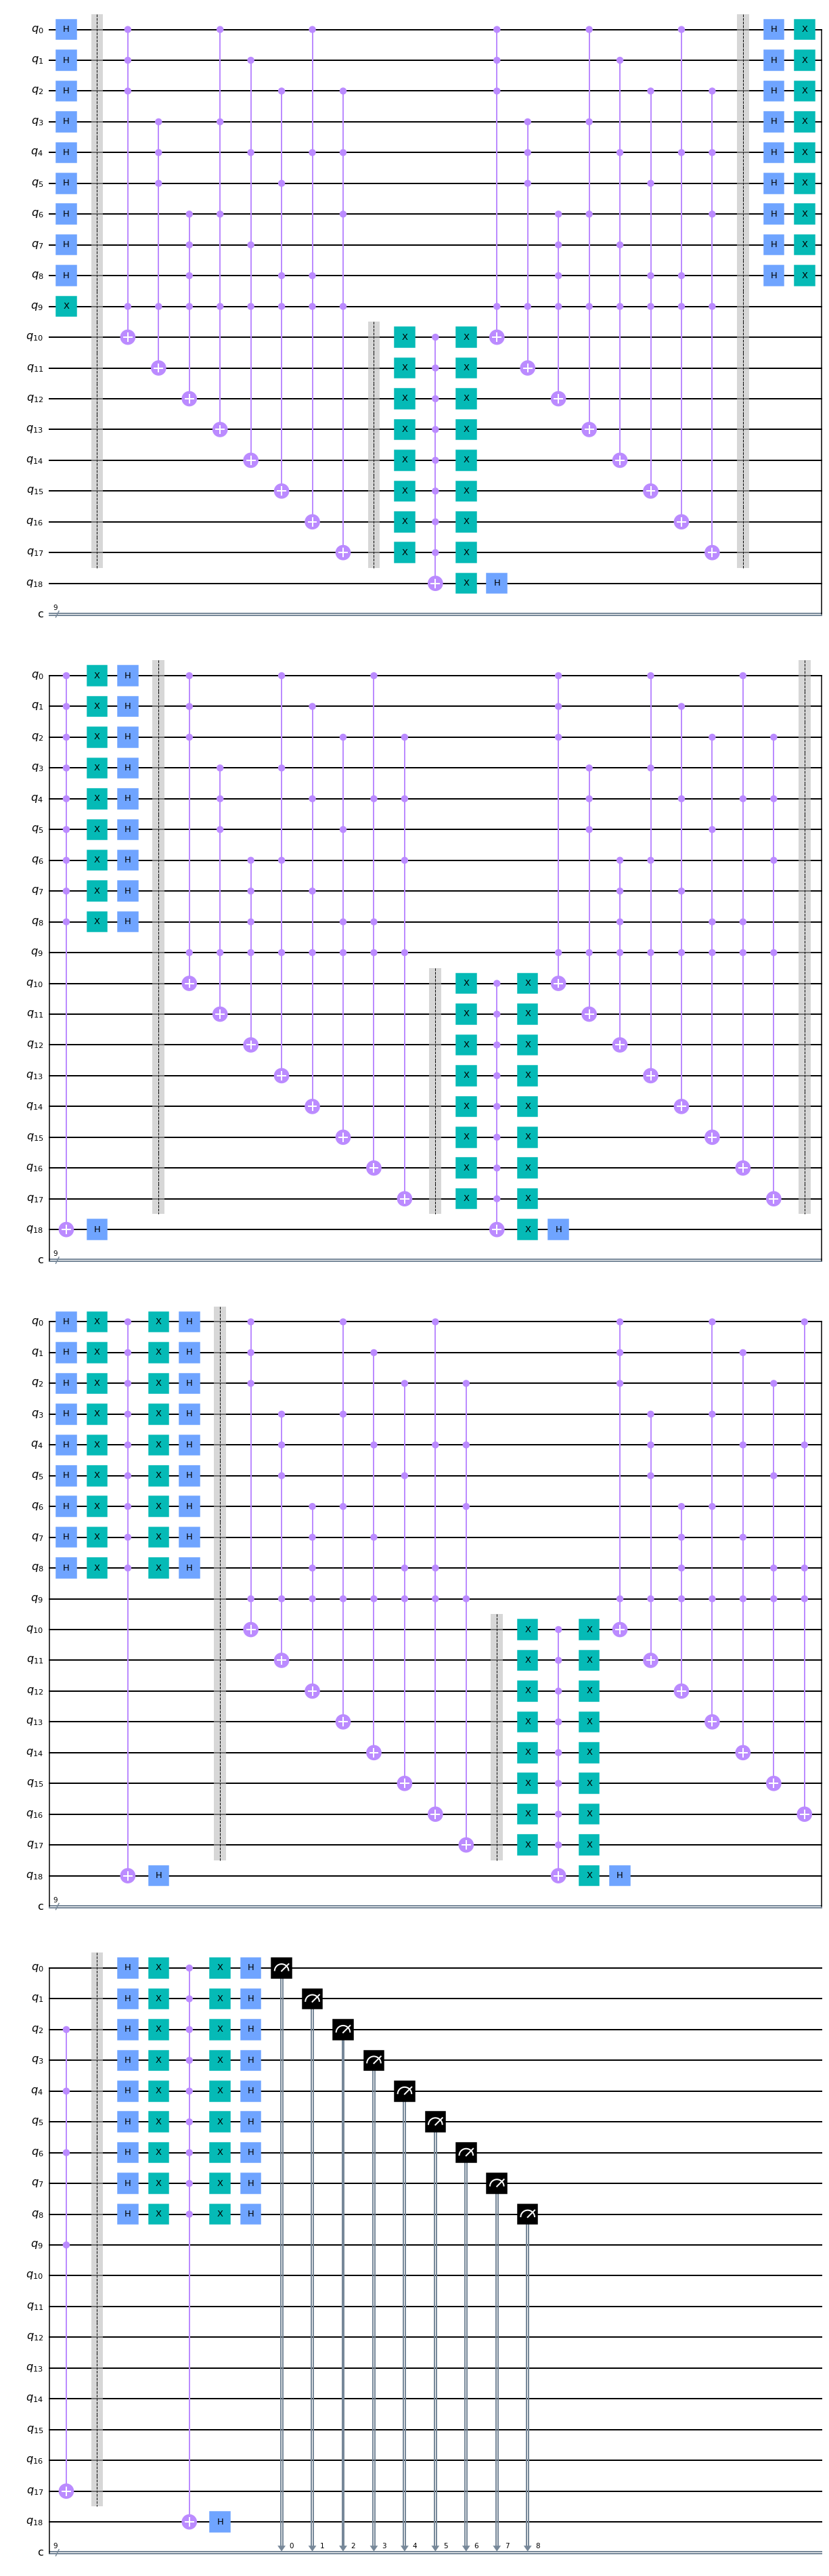

In [181]:
circuit.draw(output='mpl')

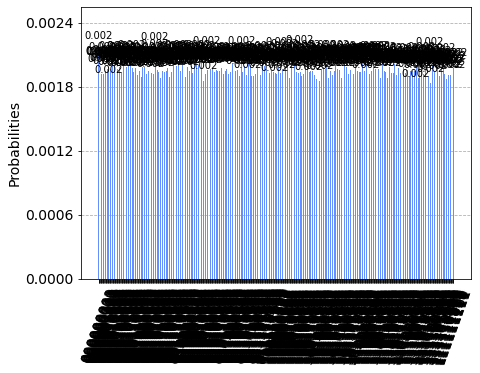

In [182]:
N = 10000
simulator = Aer.get_backend('aer_simulator')
results = execute(circuit, backend=simulator, shots=N).result()
counts = results.get_counts()
plot_histogram(counts)

array([[<AxesSubplot:title={'center':'1'}>]], dtype=object)

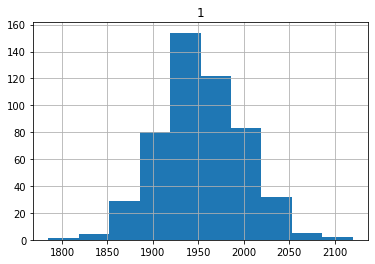

In [183]:
import pandas as pd
df = pd.DataFrame(counts.items())
df = df.sort_values(by=1, ascending=False)

df.hist()

In [184]:
print(df)

             0     1
158  000000000  2120
276  001010000  2110
202  100100001  2082
347  011001110  2081
271  010011100  2079
..         ...   ...
435  100101110  1849
113  011111110  1840
29   111011110  1831
362  000001111  1822
148  111001000  1785

[512 rows x 2 columns]


In [185]:
sum(list(df[1]))

1000000

In [186]:
df.to_csv('thangu.csv')

In [187]:
2**9

512

Hence, the problem is solved